# Import libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



# Load and read dataset

In [6]:
data=pd.read_csv(r"C:\Users\4\Downloads\Loan payments data.csv")

In [7]:
data.shape

(500, 11)

# Info and describe

In [8]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loan_ID         500 non-null    object 
 1   loan_status     500 non-null    object 
 2   Principal       500 non-null    int64  
 3   terms           500 non-null    int64  
 4   effective_date  500 non-null    object 
 5   due_date        500 non-null    object 
 6   paid_off_time   400 non-null    object 
 7   past_due_days   200 non-null    float64
 8   age             500 non-null    int64  
 9   education       500 non-null    object 
 10  Gender          500 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 43.1+ KB


In [9]:
data.describe(include='all')


,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
count,500,500,500.000000,500.000000,500,500,400,200.00000,500.000000,500,500
unique,500,3,NaN,NaN,7,25,320,NaN,NaN,4,2
top,xqd20166231,PAIDOFF,NaN,NaN,9/11/2016,10/10/2016,9/26/2016 9:00,NaN,NaN,college,male
freq,1,300,NaN,NaN,231,123,9,NaN,NaN,220,423
mean,NaN,NaN,943.200000,22.824000,NaN,NaN,NaN,36.01000,31.116000,NaN,NaN
std,NaN,NaN,115.240274,8.000064,NaN,NaN,NaN,29.38088,6.084784,NaN,NaN
min,NaN,NaN,300.000000,7.000000,NaN,NaN,NaN,1.00000,18.000000,NaN,NaN
25%,NaN,NaN,1000.000000,15.000000,NaN,NaN,NaN,3.00000,27.000000,NaN,NaN
50%,NaN,NaN,1000.000000,30.000000,NaN,NaN,NaN,37.00000,30.000000,NaN,NaN
75%,NaN,NaN,1000.000000,30.000000,NaN,NaN,NaN,60.00000,35.000000,NaN,NaN


# Data preprocessing

#### a.missing values handlling

In [10]:
data.isnull().sum()

Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days     300
age                 0
education           0
Gender              0
dtype: int64

In [11]:
refer=pd.DataFrame(data.dtypes)
refer

,0
Loan_ID,object
loan_status,object
Principal,int64
terms,int64
effective_date,object
due_date,object
paid_off_time,object
past_due_days,float64
age,int64
education,object


In [12]:
refer['NUnique']=data.nunique()
refer

,0,NUnique
Loan_ID,object,500
loan_status,object,3
Principal,int64,6
terms,int64,3
effective_date,object,7
due_date,object,25
paid_off_time,object,320
past_due_days,float64,33
age,int64,33
education,object,4


In [13]:
refer['Count']=data.count()
refer



,0,NUnique,Count
Loan_ID,object,500,500
loan_status,object,3,500
Principal,int64,6,500
terms,int64,3,500
effective_date,object,7,500
due_date,object,25,500
paid_off_time,object,320,400
past_due_days,float64,33,200
age,int64,33,500
education,object,4,500


In [14]:
refer['Missing Values']=data.isnull().sum()
refer

,0,NUnique,Count,Missing Values
Loan_ID,object,500,500,0
loan_status,object,3,500,0
Principal,int64,6,500,0
terms,int64,3,500,0
effective_date,object,7,500,0
due_date,object,25,500,0
paid_off_time,object,320,400,100
past_due_days,float64,33,200,300
age,int64,33,500,0
education,object,4,500,0


In [15]:
refer = refer.rename(columns={0:'DataType'})
refer

,DataType,NUnique,Count,Missing Values
Loan_ID,object,500,500,0
loan_status,object,3,500,0
Principal,int64,6,500,0
terms,int64,3,500,0
effective_date,object,7,500,0
due_date,object,25,500,0
paid_off_time,object,320,400,100
past_due_days,float64,33,200,300
age,int64,33,500,0
education,object,4,500,0


In [16]:
data['paid_off_time']=data['paid_off_time'].fillna(data['paid_off_time'].mode()[0])

In [17]:
data.isnull().sum()

Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time       0
past_due_days     300
age                 0
education           0
Gender              0
dtype: int64

In [18]:
data['past_due_days'].fillna(data['past_due_days'].median(),inplace=True)

C:\Users\4\AppData\Local\Temp\ipykernel_5384\186820545.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['past_due_days'].fillna(data['past_due_days'].median(),inplace=True)


In [19]:
data.isnull().sum()

Loan_ID           0
loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
paid_off_time     0
past_due_days     0
age               0
education         0
Gender            0
dtype: int64

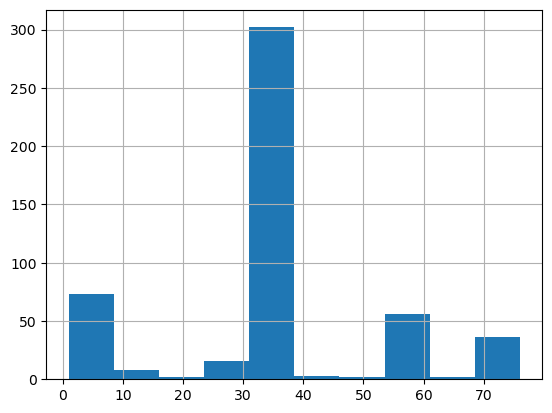

In [20]:
data['past_due_days'].hist()
plt.show()

##### Filling missing payoff dotes with the due date.
##### setting overdue days to 0 for loans that are paid off but have no delay recorded.
##### Using-1 to indicate overdue days for loans that havent't been paid off yet or have unknown status.

In [21]:
data.groupby('education')['age'].mean()

education
Bechalor                32.134328
High School or Below    31.377990
Master or Above         40.250000
college                 30.390909
Name: age, dtype: float64

##### The average past due days, loan terms, and borrows age vary by education level.Generally,borrowers with  higher educationtend to have fewer overdue days and shorter loan terms, indicating better repayment behvaiour and possibly different borrowing needs.Age difference reflect typical demographic patterns within each education group.

In [22]:
data.groupby('education')[['past_due_days','terms','past_due_days','age']].mean()

,past_due_days,terms,past_due_days,age
education,,,,
Bechalor,35.716418,21.462687,35.716418,32.134328
High School or Below,38.000000,23.631579,38.000000,31.377990
Master or Above,46.250000,11.000000,46.250000,40.250000
college,35.372727,22.686364,35.372727,30.390909


#### b.Outlier detection

##### Deside whether to cap, transform, or remove those outliers.
##### compare the effect before and after capping by re-plotting Later

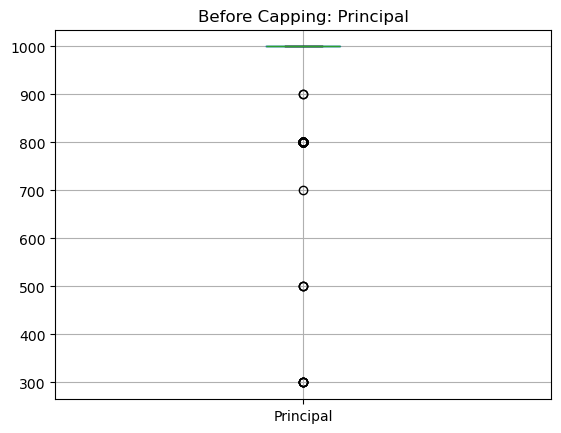

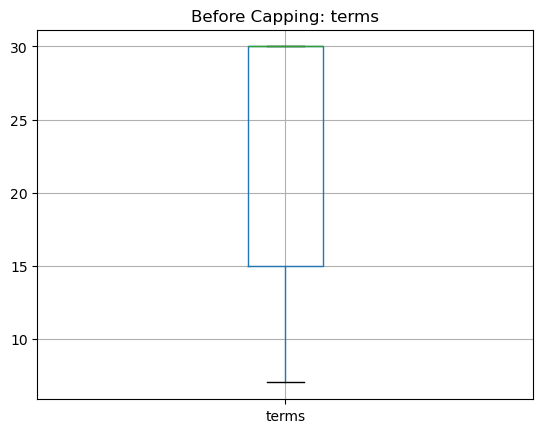

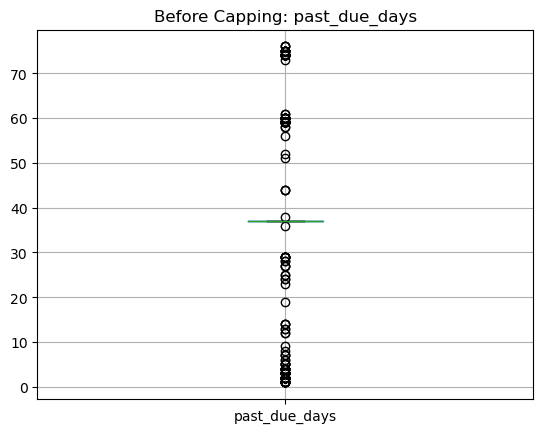

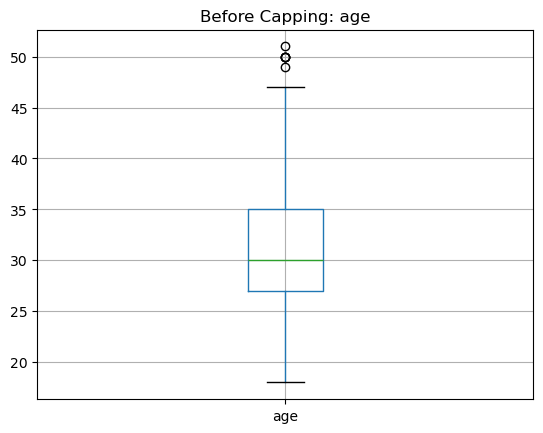

In [23]:
num = ['Principal', 'terms', 'past_due_days', 'age']

for x in num:
    plt.figure()
    data.boxplot(column=[x])
    plt.title(f"Before Capping: {x}")
    plt.show()

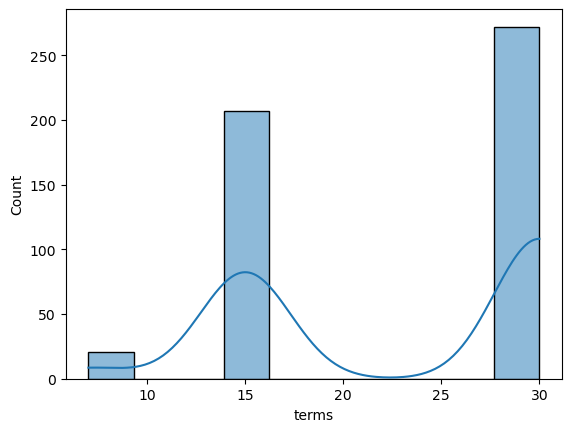

In [24]:
sns.histplot(data['terms'],kde=True)
plt.show()

##### This histogram shows the frequency distribution of the “terms” variable with a smooth KDE overlay, revealing two major peaks in the data.

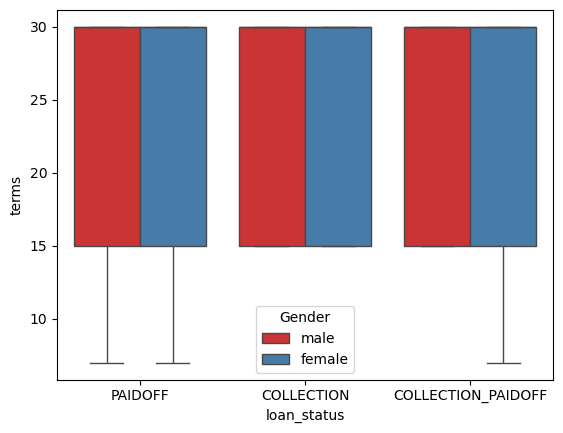

In [25]:
sns.boxplot(x='loan_status',y='terms',hue='Gender',data=data,palette='Set1')
plt.show()

##### The median term length appearars to be around 20-25 for all categories, with similer interquartile rangers and minimal outlier 

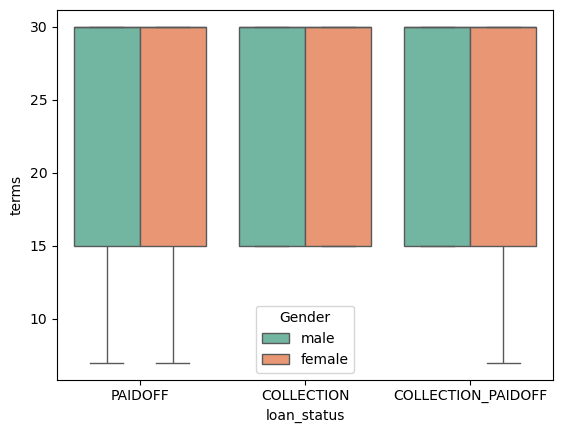

In [26]:
sns.boxplot(x='loan_status',y='terms',hue='Gender',data=data,palette='Set2')
plt.show()

In [27]:
for i in num:
    Q1=data[i].quantile(0.25)
    Q3=data[i].quantile(0.75)
    IQR=Q3-Q1
    lower_cap=Q1-1.5*IQR
    upper_cap=Q3+1.5*IQR
    data[i]=data[i].clip(lower_cap,upper_cap)

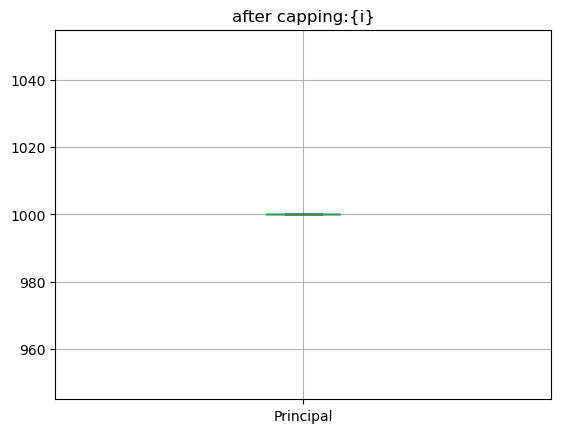

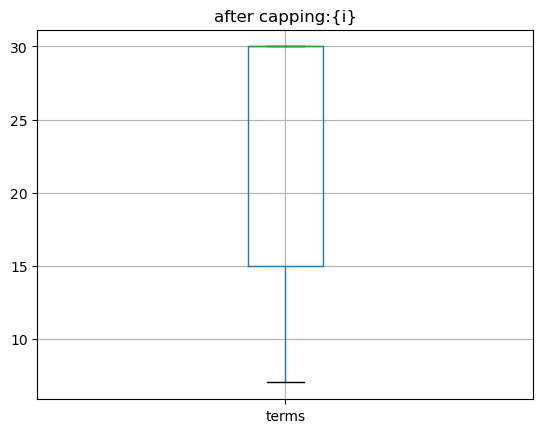

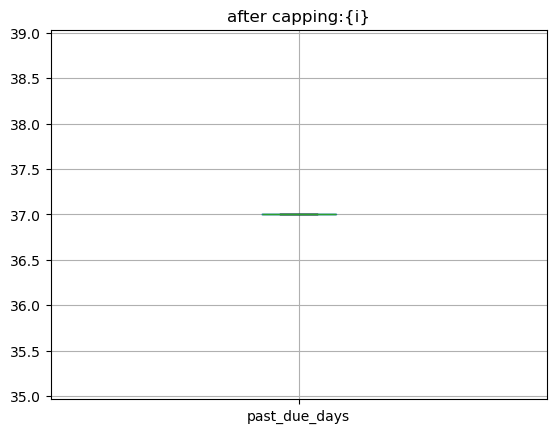

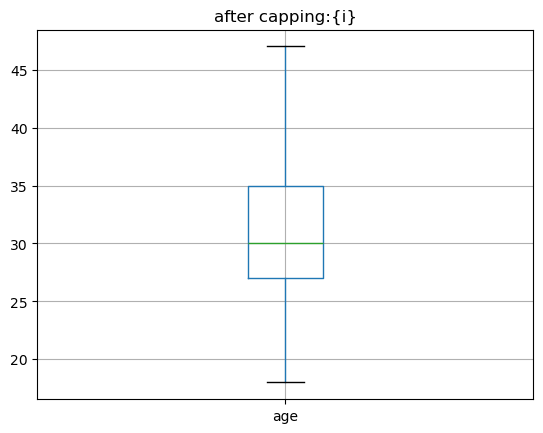

In [28]:
for i in num:
    plt.figure()
    data.boxplot(column=[i])
    plt.title("after capping:{i}")
    plt.show()

#### i.Univariate analysis

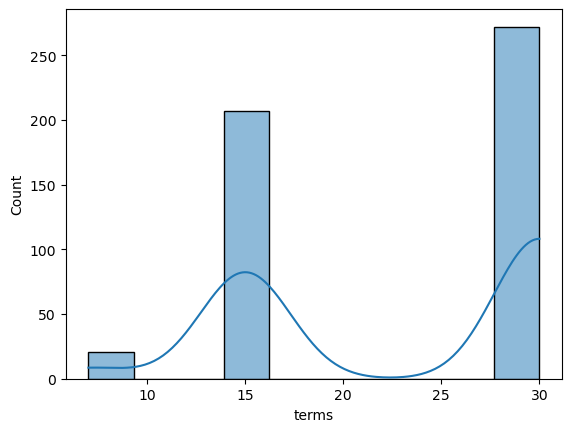

In [29]:
sns.histplot(data['terms'],kde=True)
plt.show()

C:\Users\4\AppData\Local\Temp\ipykernel_5384\3351842981.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loan_status',data=data,palette='Set2')


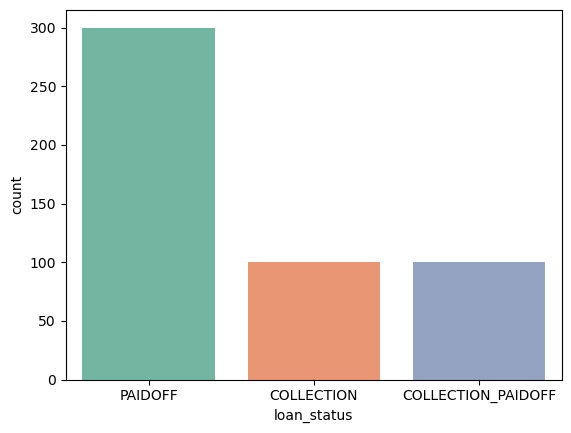

In [39]:
sns.countplot(x='loan_status',data=data,palette='Set2')
plt.show()

##### Most loans are approved: fewer loans are defaulted.

#### ii.Bivariate analysis

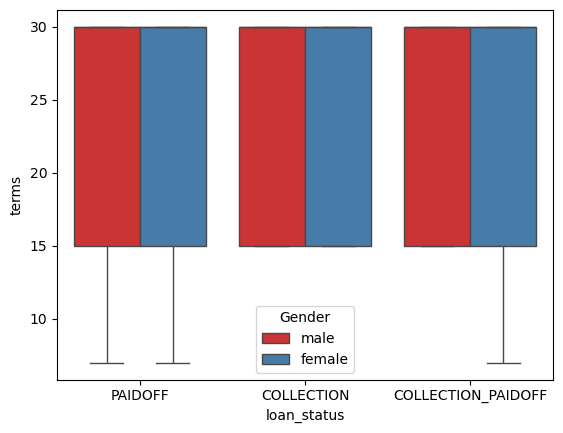

In [31]:
sns.boxplot(x='loan_status',y='terms',hue='Gender',data=data,palette='Set1')
plt.show()

##### loans terms vary by loan status gender,with similar term length for approved loans and more variation for defaults across genders.

#### countplot

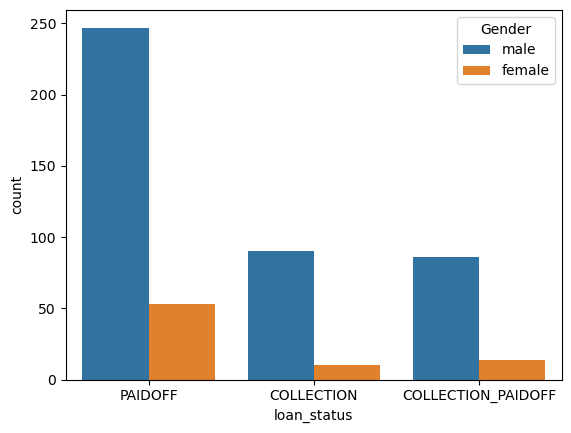

In [32]:
sns.countplot(x='loan_status',hue='Gender',data=data)
plt.show()

C:\Users\4\AppData\Local\Temp\ipykernel_5384\34754109.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='loan_status',y='age',data=data,palette='Set2')


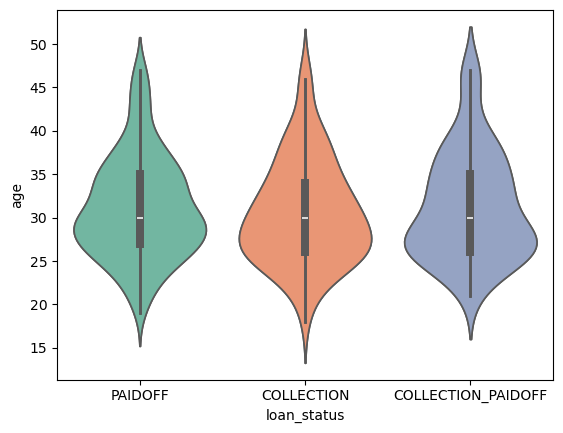

In [44]:
sns.violinplot(x='loan_status',y='age',data=data,palette='Set2')
plt.show()

##### The median age is around 30-35 for all categories, with a similar spread and density of ages.this suggest that age does not vary significantly between those who paid off their loan and those defaulted or partially paid.

#### iii.Multivariate analsis

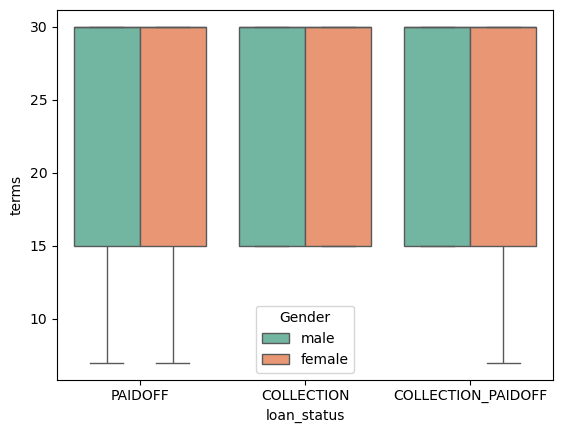

In [33]:
sns.boxplot(x='loan_status',y='terms',hue='Gender',data=data,palette='Set2')
plt.show()

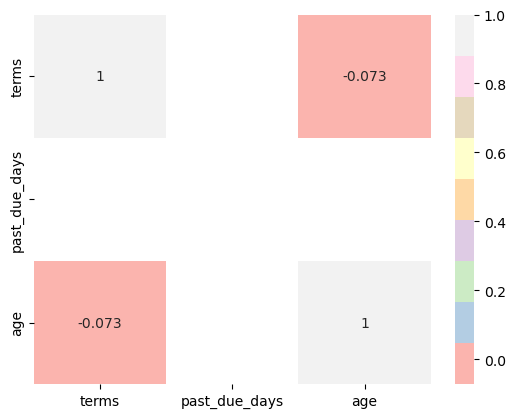

In [34]:
sns.heatmap(data[['terms','past_due_days','age']].corr(),annot=True,cmap='Pastel1')
plt.show()

In [35]:
refer

,DataType,NUnique,Count,Missing Values
Loan_ID,object,500,500,0
loan_status,object,3,500,0
Principal,int64,6,500,0
terms,int64,3,500,0
effective_date,object,7,500,0
due_date,object,25,500,0
paid_off_time,object,320,400,100
past_due_days,float64,33,200,300
age,int64,33,500,0
education,object,4,500,0


##### This image shows four bar charts comparing loan status categories ("COLLECTION" and "PROFIT") across different variables. The code on the right suggests it's a data analysis visualization created using Matplotlib and Pandas in Python.

##### Each subplot represents how the counts of loans differ by status, helping to visually compare the number of loans in each category. In summary, it's part of an exploratory data analysis (EDA) to understand loan performance distribution.

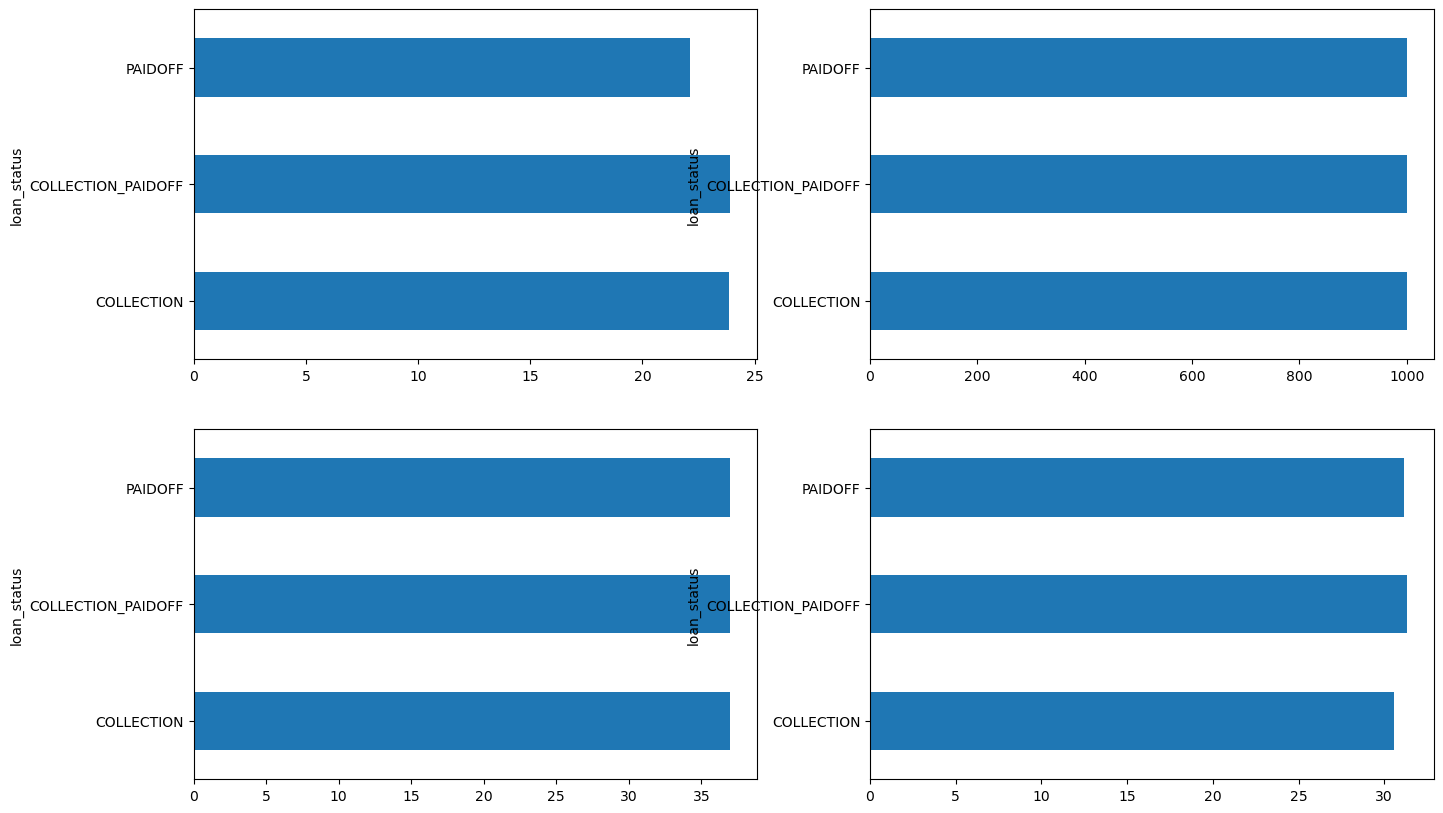

In [36]:
figbi, axesbi = plt.subplots(2, 2, figsize=(16, 10))
data.groupby('loan_status')['terms'].mean().plot(kind='barh',ax=axesbi[0,0])
data.groupby('loan_status')['Principal'].mean().plot(kind='barh',ax=axesbi[0,1])
data.groupby('loan_status')['past_due_days'].mean().plot(kind='barh',ax=axesbi[1,0])
data.groupby('loan_status')['age'].mean().plot(kind='barh',ax=axesbi[1,1])
plt.show()

##### Pairplot shows relationships between past due days,loan terms, principal, and yhe age across education levels. Different education groups cluster distinctly.Indicating education influence borrowing patterns and repayment behaviour

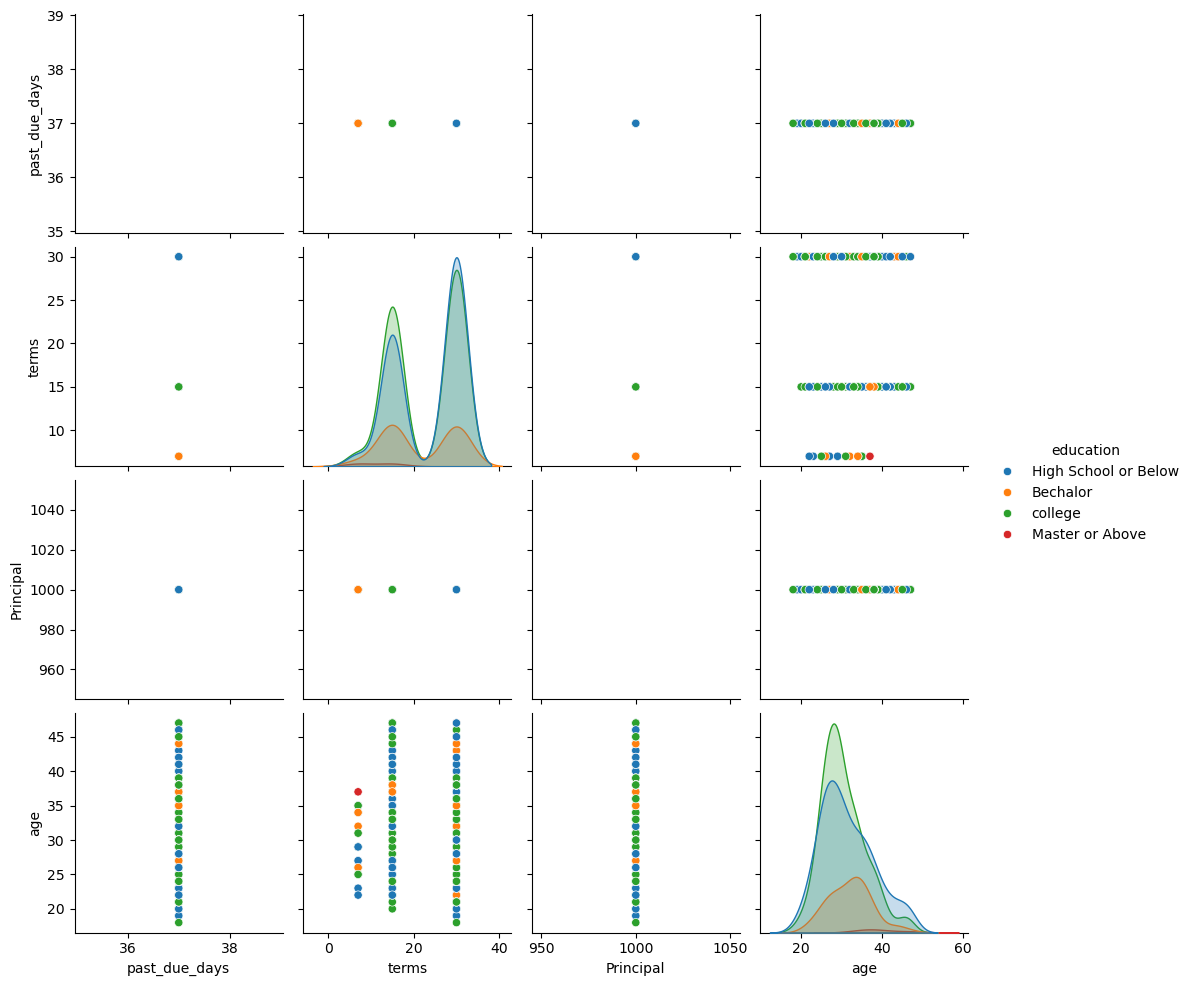

In [37]:
sns.pairplot(data[['past_due_days','terms','Principal','age','education']],hue ='education')
plt.show()

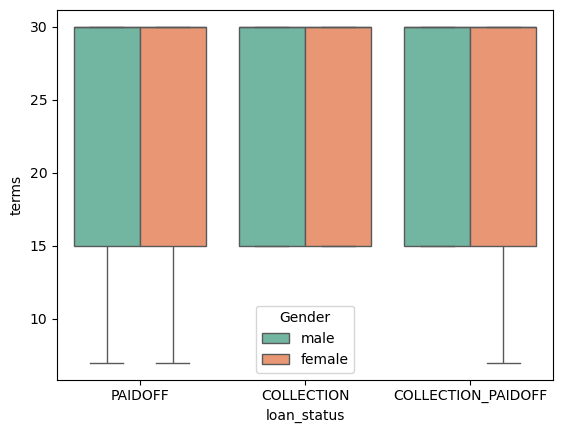

In [38]:
sns.boxplot(x='loan_status',y='terms',hue='Gender', data=data,palette='Set2')
plt.show()